In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})

In [4]:
salaries

Bonus   Name  Salary  Year
0   3000   July   10000  2016
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
3   1200    Han    5000  2016
4   4000   July   18000  2017
5   2300   July   25000  2017
6    500  Zewei    3000  2017
7   1000   July    4000  2017

In [5]:
group_by_name = salaries.groupby("Name")

In [6]:
group_by_name

In [7]:
group_by_name.sum()

Bonus  Salary  Year
Name                      
Han     1200    5000  2016
July   10300   57000  8067
Zewei   2500    9000  6049

In [8]:
group_by_name.aggregate(np.mean)

Bonus   Salary         Year
Name                                    
Han    1200.000000   5000.0  2016.000000
July   2575.000000  14250.0  2016.750000
Zewei   833.333333   3000.0  2016.333333

In [9]:
group_by_name.aggregate(np.std)

Bonus       Salary     Year
Name                                    
Han            NaN          NaN      NaN
July   1260.621540  9178.779875  0.50000
Zewei   288.675135  1000.000000  0.57735

In [10]:
group_by_name.groups

{'Han': Int64Index([3], dtype='int64'),
 'July': Int64Index([0, 4, 5, 7], dtype='int64'),
 'Zewei': Int64Index([1, 2, 6], dtype='int64')}

In [11]:
group_by_name_year = salaries.groupby(["Name","Year"])

In [12]:
group_by_name_year.groups

{('Han', 2016): Int64Index([3], dtype='int64'),
 ('July', 2016): Int64Index([0], dtype='int64'),
 ('July', 2017): Int64Index([4, 5, 7], dtype='int64'),
 ('Zewei', 2016): Int64Index([1, 2], dtype='int64'),
 ('Zewei', 2017): Int64Index([6], dtype='int64')}

In [13]:
group_by_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

In [14]:
for name,group in group_by_name:
    print(name)
    print(group)

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017


In [15]:
type(group_by_name.get_group("July"))

pandas.core.frame.DataFrame

In [16]:
df=group_by_name.get_group("July")

In [17]:
df

Bonus  Salary  Year
0   3000   10000  2016
4   4000   18000  2017
5   2300   25000  2017
7   1000    4000  2017

In [18]:
group_by_name.agg(sum)

Bonus  Salary  Year
Name                      
Han     1200    5000  2016
July   10300   57000  8067
Zewei   2500    9000  6049

In [19]:
group_by_name.agg({"Bonus":np.sum, "Salary":np.sum,"Year":(lambda x:list(x)[0])})

Bonus  Salary  Year
Name                      
Han     1200    5000  2016
July   10300   57000  2016
Zewei   2500    9000  2016

In [20]:
group_by_name_year.describe()

Bonus                                                           \
           count         mean         std     min     25%     50%     75%   
Name  Year                                                                  
Han   2016   1.0  1200.000000         NaN  1200.0  1200.0  1200.0  1200.0   
July  2016   1.0  3000.000000         NaN  3000.0  3000.0  3000.0  3000.0   
      2017   3.0  2433.333333  1504.43788  1000.0  1650.0  2300.0  3150.0   
Zewei 2016   2.0  1000.000000     0.00000  1000.0  1000.0  1000.0  1000.0   
      2017   1.0   500.000000         NaN   500.0   500.0   500.0   500.0   

                   Salary                                                \
               max  count          mean           std      min      25%   
Name  Year                                                                
Han   2016  1200.0    1.0   5000.000000           NaN   5000.0   5000.0   
July  2016  3000.0    1.0  10000.000000           NaN  10000.0  10000.0   
      2017  4000.0    3.0  15666.666667  10692.676622   4000.0  11000.0   
Zewei 2016  1000.0    2.0   3000.000000   1414.213562   2000.0   2500.0   
      2017   500.0    1.0   3000.000000           NaN   3000.0   3000.0   

                                       
                50%      75%      max  
Name  Year                             
Han   2016   5000.0   5000.0   5000.0  
July  2016  10000.0  10000.0  10000.0  
      2017  18000.0  21500.0  25000.0  
Zewei 2016   3000.0   3500.0   4000.0  
      2017   3000.0   3000.0   3000.0

In [21]:
nvda = pd.read_csv("NVDA.csv", index_col="Date", parse_dates=["Date"])

In [22]:
nvda

Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-01-22    1.750000    1.953125    1.552083    1.640625    1.523430   
1999-01-25    1.770833    1.833333    1.640625    1.812500    1.683028   
1999-01-26    1.833333    1.869792    1.645833    1.671875    1.552448   
1999-01-27    1.677083    1.718750    1.583333    1.666667    1.547611   
1999-01-28    1.666667    1.677083    1.651042    1.661458    1.542776   
1999-01-29    1.661458    1.666667    1.583333    1.583333    1.470231   
1999-02-01    1.583333    1.625000    1.583333    1.614583    1.499249   
1999-02-02    1.583333    1.625000    1.442708    1.489583    1.383178   
1999-02-03    1.468750    1.541667    1.458333    1.520833    1.412196   
1999-02-04    1.541667    1.645833    1.520833    1.604167    1.489577   
1999-02-05    1.630208    1.666667    1.588542    1.651042    1.533103   
1999-02-08    1.661458    1.666667    1.593750    1.593750    1.479904   
1999-02-09    1.625000    1.635417    1.510417    1.531250    1.421868   
1999-02-10    1.531250    1.572917    1.489583    1.515625    1.407360   
1999-02-11    1.520833    1.708333    1.520833    1.645833    1.528267   
1999-02-12    1.666667    1.750000    1.666667    1.739583    1.615320   
1999-02-16    1.770833    1.843750    1.572917    1.750000    1.624992   
1999-02-17    1.708333    1.729167    1.625000    1.656250    1.537939   
1999-02-18    1.708333    1.729167    1.635417    1.682292    1.562121   
1999-02-19    1.666667    1.770833    1.645833    1.739583    1.615320   
1999-02-22    1.770833    1.791667    1.656250    1.750000    1.624992   
1999-02-23    1.791667    1.869792    1.687500    1.833333    1.702373   
1999-02-24    2.104167    2.187500    1.932292    1.979167    1.837789   
1999-02-25    2.062500    2.125000    1.885417    1.916667    1.779754   
1999-02-26    1.937500    2.000000    1.812500    1.828125    1.697537   
1999-03-01    1.875000    1.916667    1.750000    1.838542    1.707209   
1999-03-02    1.833333    1.843750    1.791667    1.822917    1.692701   
1999-03-03    1.833333    1.833333    1.687500    1.697917    1.576630   
1999-03-04    1.781250    1.791667    1.645833    1.661458    1.542776   
1999-03-05    1.677083    1.760417    1.677083    1.755208    1.629829   
...                ...         ...         ...         ...         ...   
2017-06-08  153.460007  160.000000  151.789993  159.940002  159.940002   
2017-06-09  164.740005  168.500000  142.750000  149.600006  149.600006   
2017-06-12  145.880005  151.699997  142.110001  149.970001  149.970001   
2017-06-13  154.399994  154.770004  145.649994  151.399994  151.399994   
2017-06-14  151.520004  154.059998  148.500000  151.720001  151.720001   
2017-06-15  146.960007  153.600006  146.500000  152.369995  152.369995   
2017-06-16  152.759995  154.699997  150.240005  151.619995  151.619995   
2017-06-19  153.410004  157.529999  153.259995  157.320007  157.320007   
2017-06-20  159.029999  161.740005  156.919998  157.089996  157.089996   
2017-06-21  158.210007  159.619995  155.699997  159.470001  159.470001   
2017-06-22  159.800003  160.339996  157.399994  158.369995  158.369995   
2017-06-23  158.679993  159.320007  153.220001  153.830002  153.830002   
2017-06-26  155.160004  156.600006  148.330002  152.149994  152.149994   
2017-06-27  151.440002  151.789993  146.350006  146.580002  146.580002   
2017-06-28  149.320007  151.940002  145.750000  151.750000  151.750000   
2017-06-29  150.600006  150.720001  144.080002  146.679993  146.679993   
2017-06-30  147.380005  147.929993  143.500000  144.559998  144.559998   
2017-07-03  145.050003  145.649994  138.580002  139.330002  139.330002   
2017-07-05  141.899994  144.220001  141.130005  143.050003  143.050003   
2017-07-06  141.869995  145.380005  139.759995  143.479996  143.479996   
2017-07-07  145.779999  147.500000  144.850006  146.759995  146.759995   
2017-07-10  149.740005

In [23]:
nvda.index

DatetimeIndex(['1999-01-22', '1999-01-25', '1999-01-26', '1999-01-27',
               '1999-01-28', '1999-01-29', '1999-02-01', '1999-02-02',
               '1999-02-03', '1999-02-04',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=4654, freq=None)

In [24]:
nvda.index.year

Int64Index([1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4654)

In [25]:
nvda.groupby(nvda.index.year).agg(sum)

Open          High           Low         Close     Adj Close  \
Date                                                                         
1999    466.236931    479.748691    450.170564    465.388003    432.144014   
2000   2212.833273   2324.119758   2106.851546   2212.264221   2054.235826   
2001   3246.630925   3372.986111   3144.776022   3269.024912   3035.509070   
2002   2441.966662   2508.683327   2354.786653   2422.916673   2249.840757   
2003   1487.413339   1522.750004   1452.770001   1486.886664   1380.674086   
2004   1634.153335   1665.420009   1601.096667   1629.409996   1513.016569   
2005   2397.119994   2434.233329   2357.000000   2397.483335   2226.224187   
2006   4532.533321   4624.706682   4447.789998   4542.086679   4217.632322   
2007   6968.273319   7091.170005   6828.719994   6958.860015   6461.768676   
2008   4049.089993   4155.839998   3926.929993   4034.240013   3746.062640   
2009   2979.929996   3052.920001   2914.620003   2986.419994   2773.091422   
2010   3421.240012   3478.270005   3356.270003   3417.919989   3173.768132   
2011   4261.959989   4351.420003   4161.060008   4255.659994   3951.665951   
2012   3381.549996   3429.350002   3329.949999   3376.969999   3137.791556   
2013   3571.740001   3611.110001   3536.890000   3575.659999   3379.894134   
2014   4672.849991   4723.860013   4623.749977   4673.860014   4504.513404   
2015   5967.510012   6042.839991   5899.589984   5976.999997   5862.095339   
2016  13514.969924  13712.679989  13329.570014  13547.820003  13475.885824   
2017  16626.420058  16877.500000  16339.579996  16635.619958  16620.287025   

          Volume  
Date              
1999  1537539600  
2000  2782537800  
2001  6900320700  
2002  7985009700  
2003  6124155000  
2004  4299954900  
2005  3887919300  
2006  3851459000  
2007  3801550500  
2008  5117485100  
2009  4837948800  
2010  4670303300  
2011  5769165900  
2012  3019392000  
2013  2228684400  
2014  1788923400  
2015  1954643100  
2016  2789797300  
2017  2632683900

In [26]:
nvda.groupby(nvda.index.year).agg(np.mean)

Open        High         Low       Close   Adj Close        Volume
Date                                                                          
1999    1.950782    2.007317    1.883559    1.947230    1.808134  6.433220e+06
2000    8.781084    9.222697    8.360522    8.778826    8.151729  1.104182e+07
2001   13.091254   13.600750   12.680548   13.181552   12.239956  2.782387e+07
2002    9.690344    9.955093    9.344391    9.614749    8.927940  3.168655e+07
2003    5.902434    6.042659    5.764960    5.900344    5.478865  2.430220e+07
2004    6.484735    6.608810    6.353558    6.465913    6.004034  1.706331e+07
2005    9.512381    9.659656    9.353175    9.513823    8.834223  1.542825e+07
2006   18.057902   18.425126   17.720279   18.095963   16.803316  1.534446e+07
2007   27.762045   28.251673   27.206056   27.724542   25.744098  1.514562e+07
2008   16.004308   16.426245   15.521462   15.945613   14.806572  2.022721e+07
2009   11.825119   12.114762   11.565952   11.850873   11.004331  1.919821e+07
2010   13.576349   13.802659   13.318532   13.563175   12.594318  1.853295e+07
2011   16.912540   17.267540   16.512143   16.887540   15.681214  2.289352e+07
2012   13.526200   13.717400   13.319800   13.507880   12.551166  1.207757e+07
2013   14.173571   14.329802   14.035278   14.189127   13.412278  8.843986e+06
2014   18.543056   18.745476   18.348214   18.547064   17.875053  7.098902e+06
2015   23.680595   23.979524   23.411071   23.718254   23.262283  7.756520e+06
2016   53.630833   54.415397   52.895119   53.761190   53.475737  1.107062e+07
2017  120.481305  122.300725  118.402754  120.547971  120.436863  1.907742e+07

In [27]:
%matplotlib inline

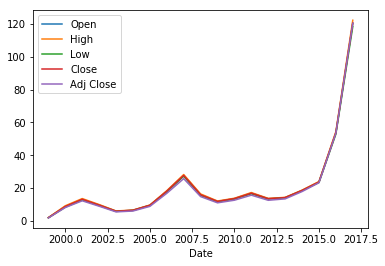

In [28]:
nvda.groupby(nvda.index.year).agg(np.mean).iloc[:,:-1].plot()

In [29]:
zscore = lambda x:(x - x.mean()) / x.std()

In [30]:
transform = nvda.groupby(nvda.index.year).transform(zscore)

In [31]:
transform

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1999-01-22 -0.340955 -0.088217 -0.579850 -0.510124  -0.510124  7.544438
1999-01-25 -0.305578 -0.283222 -0.424964 -0.224161  -0.224161  0.777210
1999-01-26 -0.199444 -0.223871 -0.415854 -0.458130  -0.458131  0.263637
1999-01-27 -0.464778 -0.469747 -0.525185 -0.466795  -0.466798 -0.039791
1999-01-28 -0.482465 -0.537575 -0.406741 -0.475462  -0.475461 -0.091517
1999-01-29 -0.491311 -0.554531 -0.525185 -0.605445  -0.605445 -0.040823
1999-02-01 -0.623978 -0.622359 -0.525185 -0.553452  -0.553451 -0.315073
1999-02-02 -0.623978 -0.622359 -0.771180 -0.761424  -0.761424  0.020776
1999-02-03 -0.818555 -0.758014 -0.743847 -0.709431  -0.709430 -0.559407
1999-02-04 -0.694732 -0.588446 -0.634516 -0.570782  -0.570781 -0.231516
1999-02-05 -0.544378 -0.554531 -0.516073 -0.492792  -0.492793 -0.369893
1999-02-08 -0.491311 -0.554531 -0.506962 -0.588113  -0.588113 -0.316988
1999-02-09 -0.553221 -0.605402 -0.652737 -0.692099  -0.692100 -0.523007
1999-02-10 -0.712421 -0.707143 -0.689181 -0.718096  -0.718095 -0.334967
1999-02-11 -0.730111 -0.486705 -0.634516 -0.501459  -0.501458 -0.384040
1999-02-12 -0.482465 -0.418876 -0.379409 -0.345479  -0.345479 -0.453155
1999-02-16 -0.305578 -0.266264 -0.543405 -0.328148  -0.328149 -0.142211
1999-02-17 -0.411711 -0.452790 -0.452297 -0.484127  -0.484128 -0.582101
1999-02-18 -0.411711 -0.452790 -0.434074 -0.440799  -0.440799 -0.572964
1999-02-19 -0.482465 -0.384963 -0.415854 -0.345479  -0.345479 -0.558670
1999-02-22 -0.305578 -0.351048 -0.397631 -0.328148  -0.328149 -0.159895
1999-02-23 -0.270199 -0.223871 -0.342966 -0.189500  -0.189499 -0.366061
1999-02-24  0.260468  0.293314  0.085249  0.053136   0.053135  1.091248
1999-02-25  0.189712  0.191572  0.003250 -0.050850  -0.050850 -0.332167
1999-02-26 -0.022555 -0.011911 -0.124303 -0.198165  -0.198164 -0.260105
1999-03-01 -0.128688 -0.147565 -0.233634 -0.180833  -0.180834 -0.507091
1999-03-02 -0.199444 -0.266264 -0.160746 -0.206830  -0.206829 -0.620416
1999-03-03 -0.199444 -0.283222 -0.342966 -0.414802  -0.414802 -0.601554
1999-03-04 -0.287888 -0.351048 -0.415854 -0.475462  -0.475461 -0.613932
1999-03-05 -0.464778 -0.401919 -0.361188 -0.319483  -0.319482 -0.548207
...              ...       ...       ...       ...        ...       ...
2017-06-08  1.497139  1.674761  1.568812  1.791207   1.791015  0.928518
2017-06-09  2.009218  2.052367  1.144037  1.321034   1.322214  6.824084
2017-06-12  1.153028  1.306040  1.113965  1.337858   1.338989  2.176461
2017-06-13  1.539811  1.442422  1.280303  1.402881   1.403823  2.118167
2017-06-14  1.409068  1.410881  1.414220  1.417432   1.418332  0.981847
2017-06-15  1.202057  1.390446  1.320244  1.446989   1.447802  0.467528
2017-06-16  1.465360  1.439312  1.495980  1.412885   1.413798  0.377007
2017-06-19  1.494869  1.565033  1.637885  1.672072   1.672228  0.035122
2017-06-20  1.750000  1.752059  1.809862  1.661613   1.661800  0.774094
2017-06-21  1.712775  1.657879  1.752537  1.769835   1.769706 -0.187370
2017-06-22  1.784956  1.689865  1.832417  1.719816   1.719833 -0.684695
2017-06-23  1.734111  1.644553  1.636006  1.513377   1.513996  0.758125
2017-06-26  1.574314  1.523719  1.406233  1.436985   1.437827  0.700763
2017-06-27  1.405436  1.310038  1.313196  1.183710   1.185292  0.550605
2017-06-28  1.309195  1.316702  1.285002  1.418797   1.419692  0.540022
2017-06-29  1.367303  1.262504  1.206532  1.188257   1.189825  0.701843
2017-06-30  1.221124  1.138560  1.179279  1.091858   1.093708 -0.081430
2017-07-03  1.115349  1.037273  0.948096  0.854043   0.856587 -0.125833
2017-07-05  0.972347  0.973747  1.067916  1.023196   1.025247  0.132975
2017-07-06  0.970985  1.025279  1.003542  1.042749   1.044742 -0.039160
2017-07-07  1.148488  1.119458  1.242713  1.191895   1.193452 -0.251841
2017-07-10  1.328261  1.408216  1.422678  1.507465   1.508102  0.455109
2017-07-11  1.514843  1.505505  1.585728  1.606593   1.6

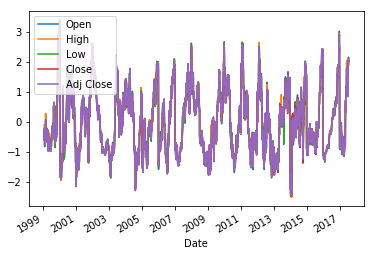

In [32]:
transform.iloc[:, :-1].plot()

In [33]:
transform.groupby(transform.index.year).mean()

Open          High           Low         Close     Adj Close  \
Date                                                                         
1999  5.908802e-16 -1.111152e-15  2.694265e-16  4.775353e-16  3.976364e-16   
2000 -8.106390e-17 -1.564005e-16  6.608470e-17  1.727014e-16 -4.150119e-16   
2001  3.832060e-16 -3.599271e-16 -2.596489e-16 -9.490616e-17 -4.064849e-16   
2002  2.123522e-16 -3.929837e-16 -1.299666e-16  1.202742e-16  1.224770e-16   
2003  1.268826e-16  1.013299e-16 -2.396672e-16 -9.780536e-17  3.647876e-16   
2004 -1.762259e-17 -1.696174e-16  2.326182e-16  3.947460e-16  9.780536e-17   
2005 -4.202987e-16 -4.185365e-16  1.815127e-16  2.564087e-16  6.925677e-16   
2006  3.476635e-16  1.972747e-16 -2.963544e-16 -1.141185e-16  1.403923e-15   
2007  7.696367e-17  1.840051e-16  9.607189e-16 -4.830134e-16  3.715487e-17   
2008 -5.880233e-16  3.422822e-16 -1.044400e-16  4.835833e-16  5.810021e-16   
2009  5.216286e-16 -2.396672e-16 -7.225261e-17  1.586033e-17 -9.498575e-16   
2010 -6.084198e-16  1.004487e-15  4.696420e-16  2.951783e-16 -3.802073e-16   
2011  6.762668e-16 -5.013626e-16 -1.083349e-15  1.691768e-16  2.594926e-16   
2012  2.531308e-16 -6.217249e-18  1.138645e-15  2.557954e-16 -7.212009e-16   
2013 -5.418946e-16 -2.493596e-16  3.868158e-16  1.979017e-15 -7.577713e-16   
2014 -3.692813e-15  2.130571e-15  2.188725e-15  1.045019e-15 -2.079465e-16   
2015 -2.396672e-16 -4.476137e-16 -8.811294e-17  2.379049e-16  9.868649e-17   
2016 -2.273314e-16  1.268826e-16 -1.779881e-16  4.070818e-16 -4.000327e-16   
2017  4.601794e-16  4.827057e-17 -2.799693e-16 -1.187456e-15 -4.086908e-16   

            Volume  
Date                
1999  7.687946e-17  
2000  1.105817e-16  
2001 -4.611007e-17  
2002 -4.361590e-17  
2003  0.000000e+00  
2004 -1.687363e-16  
2005 -3.172066e-17  
2006  1.260612e-16  
2007 -1.725048e-16  
2008  1.360352e-16  
2009  9.637353e-17  
2010 -1.912051e-16  
2011 -9.956762e-17  
2012 -2.131628e-17  
2013  8.811294e-18  
2014  1.083789e-16  
2015  8.723181e-17  
2016 -1.268826e-16  
2017  7.823854e-17

In [34]:
nvda.groupby(nvda.index.year).transform(lambda x:x.max()- x.mean())

Open       High        Low      Close  Adj Close  \
Date                                                                
1999-01-22   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-01-25   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-01-26   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-01-27   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-01-28   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-01-29   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-01   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-02   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-03   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-04   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-05   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-08   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-09   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-10   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-11   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-12   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-16   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-17   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-18   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-19   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-22   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-23   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-24   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-25   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-02-26   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-03-01   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-03-02   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-03-03   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-03-04   1.997135   1.945808   1.960191   1.964228   1.823918   
1999-03-05   1.997135   1.945808   1.960191   1.964228   1.823918   
...               ...        ...        ...        ...        ...   
2017-06-08  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-09  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-12  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-13  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-14  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-15  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-16  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-19  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-20  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-21  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-22  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-23  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-26  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-27  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-28  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-29  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-06-30  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-03  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-05  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-06  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-07  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-10  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-11  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-12  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-13  45.848697  46.199275  46.207247  46.952029  47.063137   
2017-07-14  45.

In [35]:
s = pd.Series([1,1,2,2,2,3,3,3,3,3,3])

In [36]:
s.groupby(s).sum()

1     2
2     6
3    18
dtype: int64

In [37]:
s.groupby(s).filter(lambda x: x.sum()>4)

2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    3
dtype: int64

In [38]:
myDf = pd.DataFrame({"A": np.arange(8), "B":list("aabbbfds")})

In [39]:
myDf

A  B
0  0  a
1  1  a
2  2  b
3  3  b
4  4  b
5  5  f
6  6  d
7  7  s

In [40]:
myDf.groupby("B").filter(lambda x: len(x) >2)

A  B
2  2  b
3  3  b
4  4  b

In [41]:
nvda.groupby([nvda.index.year , nvda.index.month]).filter(lambda x: x["Adj Close"].mean() < 50)

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1999-01-22   1.750000   1.953125   1.552083   1.640625   1.523430  67867200
1999-01-25   1.770833   1.833333   1.640625   1.812500   1.683028  12762000
1999-01-26   1.833333   1.869792   1.645833   1.671875   1.552448   8580000
1999-01-27   1.677083   1.718750   1.583333   1.666667   1.547611   6109200
1999-01-28   1.666667   1.677083   1.651042   1.661458   1.542776   5688000
1999-01-29   1.661458   1.666667   1.583333   1.583333   1.470231   6100800
1999-02-01   1.583333   1.625000   1.583333   1.614583   1.499249   3867600
1999-02-02   1.583333   1.625000   1.442708   1.489583   1.383178   6602400
1999-02-03   1.468750   1.541667   1.458333   1.520833   1.412196   1878000
1999-02-04   1.541667   1.645833   1.520833   1.604167   1.489577   4548000
1999-02-05   1.630208   1.666667   1.588542   1.651042   1.533103   3421200
1999-02-08   1.661458   1.666667   1.593750   1.593750   1.479904   3852000
1999-02-09   1.625000   1.635417   1.510417   1.531250   1.421868   2174400
1999-02-10   1.531250   1.572917   1.489583   1.515625   1.407360   3705600
1999-02-11   1.520833   1.708333   1.520833   1.645833   1.528267   3306000
1999-02-12   1.666667   1.750000   1.666667   1.739583   1.615320   2743200
1999-02-16   1.770833   1.843750   1.572917   1.750000   1.624992   5275200
1999-02-17   1.708333   1.729167   1.625000   1.656250   1.537939   1693200
1999-02-18   1.708333   1.729167   1.635417   1.682292   1.562121   1767600
1999-02-19   1.666667   1.770833   1.645833   1.739583   1.615320   1884000
1999-02-22   1.770833   1.791667   1.656250   1.750000   1.624992   5131200
1999-02-23   1.791667   1.869792   1.687500   1.833333   1.702373   3452400
1999-02-24   2.104167   2.187500   1.932292   1.979167   1.837789  15319200
1999-02-25   2.062500   2.125000   1.885417   1.916667   1.779754   3728400
1999-02-26   1.937500   2.000000   1.812500   1.828125   1.697537   4315200
1999-03-01   1.875000   1.916667   1.750000   1.838542   1.707209   2304000
1999-03-02   1.833333   1.843750   1.791667   1.822917   1.692701   1381200
1999-03-03   1.833333   1.833333   1.687500   1.697917   1.576630   1534800
1999-03-04   1.781250   1.791667   1.645833   1.661458   1.542776   1434000
1999-03-05   1.677083   1.760417   1.677083   1.755208   1.629829   1969200
...               ...        ...        ...        ...        ...       ...
2016-05-19  43.189999  43.860001  43.130001  43.549999  43.192429   9972000
2016-05-20  43.820000  44.509998  43.750000  44.330002  43.966026   9777100
2016-05-23  44.520000  44.689999  44.130001  44.400002  44.035450  10340900
2016-05-24  44.419998  45.500000  44.299999  45.360001  45.104393  10394700
2016-05-25  45.500000  45.689999  44.810001  45.169998  44.915462  11451900
2016-05-26  45.250000  45.980000  45.119999  45.650002  45.392757   7749100
2016-05-27  45.700001  45.970001  45.549999  45.900002  45.641350   6931800
2016-05-31  46.099998  46.820000  46.070000  46.720001  46.456730  10313100
2016-06-01  46.500000  47.259998  46.360001  46.810001  46.546219   9678300
2016-06-02  47.060001  47.540001  46.599998  47.139999  46.874363   8230200
2016-06-03  46.680000  46.740002  45.660000  46.480000  46.218079  11526900
2016-06-06  46.599998  46.959999  46.000000  46.240002  45.979435   8062800
2016-06-07  46.520000  46.779999  46.310001  46.330002  46.068928   4835000
2016-06-08  46.340000  46.509998  45.799999  46.180000  45.919773   5865400
2016-06-09  46.020000  47.450001  45.919998  47.380001  47.113010  11804200
2016-06-10  46.820000  47.240002  46.139999  46.200001  45.939659  10000600
2016-06-13  46.250000  47.700001  46.250000  46.790001  46.526333  11889700
2016-06-14  46.680000  47.099998  46.160000  46.880001  46.615826   7458600
2016-06-15  47.270000  47.770000  46.750000  47.360001  47.093121   7525900
2016-06-16  47.009998  47.630001  46.549999  47.549999  47.282051

In [42]:
nvda.groupby([nvda.index.year, nvda.index.month]).filter(lambda x: x["Adj Close"].mean() > 50)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-07-01   46.750000   47.360001   46.500000   46.660000   46.397064   
2016-07-05   46.400002   47.430000   46.029999   47.349998   47.083176   
2016-07-06   47.020000   47.930000   46.779999   47.650002   47.381493   
2016-07-07   47.970001   49.060001   47.750000   48.889999   48.614498   
2016-07-08   49.410000   51.090000   49.220001   50.849998   50.563454   
2016-07-11   51.580002   52.400002   51.520000   52.020000   51.726864   
2016-07-12   52.599998   53.279999   51.939999   52.799999   52.502468   
2016-07-13   52.900002   53.200001   52.700001   52.779999   52.482574   
2016-07-14   53.060001   53.799999   52.619999   53.320000   53.019539   
2016-07-15   52.639999   52.939999   51.840000   52.700001   52.403030   
2016-07-18   53.349998   53.430000   52.770000   52.970001   52.671513   
2016-07-19   52.939999   53.730000   52.840000   53.520000   53.218410   
2016-07-20   53.700001   54.509998   53.480000   54.220001   53.914467   
2016-07-21   54.099998   54.270000   53.040001   53.220001   52.920101   
2016-07-22   53.410000   54.669998   53.020000   54.669998   54.361927   
2016-07-25   55.000000   55.810001   54.759998   55.680000   55.366238   
2016-07-26   56.169998   56.919998   56.090000   56.630001   56.310886   
2016-07-27   57.119999   57.220001   55.720001   56.060001   55.744099   
2016-07-28   56.189999   56.599998   56.009998   56.180000   55.863422   
2016-07-29   56.389999   57.250000   55.380001   57.099998   56.778233   
2016-08-01   57.340000   57.549999   56.360001   56.730000   56.410324   
2016-08-02   57.000000   57.029999   55.500000   56.040001   55.724209   
2016-08-03   55.970001   56.299999   55.660000   56.189999   55.873360   
2016-08-04   56.459999   57.490002   56.349998   57.230000   56.907501   
2016-08-05   57.889999   58.230000   57.610001   58.200001   57.872040   
2016-08-08   59.000000   59.139999   58.119999   58.740002   58.408997   
2016-08-09   59.029999   59.459999   58.740002   58.889999   58.558147   
2016-08-10   59.410000   59.500000   58.320000   58.509998   58.180286   
2016-08-11   58.820000   59.950001   58.700001   59.700001   59.363583   
2016-08-12   61.900002   63.380001   60.630001   63.040001   62.684769   
...                ...         ...         ...         ...         ...   
2017-06-08  153.460007  160.000000  151.789993  159.940002  159.940002   
2017-06-09  164.740005  168.500000  142.750000  149.600006  149.600006   
2017-06-12  145.880005  151.699997  142.110001  149.970001  149.970001   
2017-06-13  154.399994  154.770004  145.649994  151.399994  151.399994   
2017-06-14  151.520004  154.059998  148.500000  151.720001  151.720001   
2017-06-15  146.960007  153.600006  146.500000  152.369995  152.369995   
2017-06-16  152.759995  154.699997  150.240005  151.619995  151.619995   
2017-06-19  153.410004  157.529999  153.259995  157.320007  157.320007   
2017-06-20  159.029999  161.740005  156.919998  157.089996  157.089996   
2017-06-21  158.210007  159.619995  155.699997  159.470001  159.470001   
2017-06-22  159.800003  160.339996  157.399994  158.369995  158.369995   
2017-06-23  158.679993  159.320007  153.220001  153.830002  153.830002   
2017-06-26  155.160004  156.600006  148.330002  152.149994  152.149994   
2017-06-27  151.440002  151.789993  146.350006  146.580002  146.580002   
2017-06-28  149.320007  151.940002  145.750000  151.750000  151.750000   
2017-06-29  150.600006  150.720001  144.080002  146.679993  146.679993   
2017-06-30  147.380005  147.929993  143.500000  144.559998  144.559998   
2017-07-03  145.050003  145.649994  138.580002  139.330002  139.330002   
2017-07-05  141.899994  144.220001  141.130005  143.050003  143.050003   
2017-07-06  141.869995  145.380005  139.759995  143.479996  143.479996   
2017-07-07  145.779999  147.500000  144.850006  146.759995  146.759995   
2017-07-10  149.740005

In [43]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing']
                  )

print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [44]:
df2 = pd.DataFrame({'cars': [150000, 120000],
                    'apts': [25000, 20000],
                   },
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [45]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],'mar': [180000, 100000]},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars     mar
Guangzhou  30000  180000  180000
Chongqing  10000  100000  100000


In [46]:
frames = [df1,df2,df3]

In [47]:
result = pd.concat(frames)

In [48]:
frames

[           apts    cars
 Shanghai  55000  200000
 Beijing   60000  300000,            apts    cars
 Hangzhou  25000  150000
 Najing    20000  120000,             apts    cars     mar
 Guangzhou  30000  180000  180000
 Chongqing  10000  100000  100000]

In [49]:
result

apts    cars       mar
Shanghai   55000  200000       NaN
Beijing    60000  300000       NaN
Hangzhou   25000  150000       NaN
Najing     20000  120000       NaN
Guangzhou  30000  180000  180000.0
Chongqing  10000  100000  100000.0

In [54]:
results = pd.concat(frames, keys = ["df1", "df2", "df3"])

In [55]:
results

apts    cars       mar
df1 Shanghai   55000  200000       NaN
    Beijing    60000  300000       NaN
df2 Hangzhou   25000  150000       NaN
    Najing     20000  120000       NaN
df3 Guangzhou  30000  180000  180000.0
    Chongqing  10000  100000  100000.0

In [56]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [57]:
df4

salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000

In [58]:
results2=pd.concat([result,df4])

In [59]:
results2

apts      cars       mar  salaries
Shanghai   55000.0  200000.0       NaN       NaN
Beijing    60000.0  300000.0       NaN       NaN
Hangzhou   25000.0  150000.0       NaN       NaN
Najing     20000.0  120000.0       NaN       NaN
Guangzhou  30000.0  180000.0  180000.0       NaN
Chongqing  10000.0  100000.0  100000.0       NaN
Suzhou         NaN       NaN       NaN   10000.0
Beijing        NaN       NaN       NaN   30000.0
Shanghai       NaN       NaN       NaN   30000.0
Guangzhou      NaN       NaN       NaN   20000.0
Tianjin        NaN       NaN       NaN   15000.0

In [70]:
df6 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000],
                  'city': ['Shanghai', 'Beijing','Shenzhen']})
print(df6)

    apts    cars      city
0  55000  200000  Shanghai
1  60000  300000   Beijing
2  58000  250000  Shenzhen


In [71]:
df7 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],
                  'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})
print(df7)

        city  salaries
0     Suzhou     10000
1    Beijing     30000
2   Shanghai     30000
3  Guangzhou     20000
4    Tianjin     15000


In [76]:
pd.concat([df6,df7])

apts      cars       city  salaries
0  55000.0  200000.0   Shanghai       NaN
1  60000.0  300000.0    Beijing       NaN
2  58000.0  250000.0   Shenzhen       NaN
0      NaN       NaN     Suzhou   10000.0
1      NaN       NaN    Beijing   30000.0
2      NaN       NaN   Shanghai   30000.0
3      NaN       NaN  Guangzhou   20000.0
4      NaN       NaN    Tianjin   15000.0

In [77]:
pd.merge(df6,df7,on = "city")

apts    cars      city  salaries
0  55000  200000  Shanghai     30000
1  60000  300000   Beijing     30000

## Project

In [78]:
ratings   = pd.read_csv("ratings_small.csv")

In [79]:
movieMetas = pd.read_csv("movies_metadata.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [82]:
ratings.shape

(100004, 4)

In [121]:
ratings_describe = ratings.groupby("movieId").agg({"rating":np.mean, "userId":"count"})

In [126]:
ratings_describe.columns=["rating","count"]

In [127]:
ratings_describe.head()

rating  count
movieId                 
1        3.872470    247
2        3.401869    107
3        3.161017     59
4        2.384615     13
5        3.267857     56

In [128]:
raings_describe.shape

(9066, 2)

In [129]:
movieMetas.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview    ...     release_date  \
0  Led by Woody, Andy's toys live happily in his ...    ...       1995-10-30   
1  When siblings Judy and Peter discover an encha...    ...       1995-12-15   
2  A family wedding reignites the ancient feud be...    ...       1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    ...       1995-12-22   
4  Just when George Banks has recovered from his ...    ...       1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [130]:
movieMetas.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [131]:
movie_titles = movieMetas[["id", "title"]]

In [132]:
movie_titles.columns=["movieId","title"]

In [133]:
movie_titles

movieId                             title
0         862                         Toy Story
1        8844                           Jumanji
2       15602                  Grumpier Old Men
3       31357                 Waiting to Exhale
4       11862       Father of the Bride Part II
5         949                              Heat
6       11860                           Sabrina
7       45325                      Tom and Huck
8        9091                      Sudden Death
9         710                         GoldenEye
10       9087            The American President
11      12110       Dracula: Dead and Loving It
12      21032                             Balto
13      10858                             Nixon
14       1408                  Cutthroat Island
15        524                            Casino
16       4584             Sense and Sensibility
17          5                        Four Rooms
18       9273    Ace Ventura: When Nature Calls
19      11517                       Money Train
20       8012                        Get Shorty
21       1710                           Copycat
22       9691                         Assassins
23      12665                            Powder
24        451                 Leaving Las Vegas
25      16420                           Othello
26       9263                      Now and Then
27      17015                        Persuasion
28        902         The City of Lost Children
29      37557                    Shanghai Triad
...       ...                               ...
45436   45527                   The Final Storm
45437  455661                    In a Heartbeat
45438  327237            Blood, Sweat and Tears
45439   84710                      Jungle Woman
45440   39562                 To Be Fat Like Me
45441   14008                       Cadet Kelly
45442   44330   The Scheming Gambler's Paradise
45443   49279      The Man with the Rubber Head
45444   44333          The Living Playing Cards
45445   49277             The Hilarious Posters
45446   49271               The Devilish Tenant
45447   44324           The Untameable Whiskers
45448  122036  The Imperceptable Transmutations
45449   14885  Pooh's Heffalump Halloween Movie
45450   49280                  The One-Man Band
45451  106807  The Fat and Lean Wrestling Match
45452  276895                       Deep Hearts
45453  404604                               Mom
45454  420346                 The Morning After
45455   67179         St. Michael Had a Rooster
45456   84419                  House of Horrors
45457  390959         Shadow of the Blair Witch
45458  289923               The Burkittsville 7
45459  222848                   Caged Heat 3000
45460   30840                        Robin Hood
45461  439050                            Subdue
45462  111109               Century of Birthing
45463   67758                          Betrayal
45464  227506                  Satan Triumphant
45465  461257                          Queerama

[45466 rows x 2 columns]

In [134]:
movie_ratings_describe = pd.merge(ratings_describe, movie_titles, left_index=True, right_index=True)

In [137]:
movie_ratings_describe.sort_values(by = ["count","rating"], ascending=False)

rating  count movieId  \
356    4.054252    341   10660   
296    4.256173    324   11450   
318    4.487138    311   20306   
593    4.138158    304   15477   
260    4.221649    291   17961   
480    3.706204    274    9593   
2571   4.183398    259   14283   
1      3.872470    247    8844   
527    4.303279    244   11592   
589    4.006329    237   10895   
1196   4.232906    234     763   
110    3.945175    228   33542   
1270   4.015487    226   61536   
608    4.256696    224   10112   
2858   4.236364    220   10496   
1198   4.193182    220   18971   
780    3.483945    218   38223   
1210   4.059908    217    9964   
588    3.674419    215   10020   
457    3.953052    213   41006   
2959   4.178218    202    2690   
590    3.717822    202     114   
50     4.370647    201  117164   
47     4.034826    201   10530   
858    4.487500    200    3587   
4993   4.182500    200   93427   
150    3.902500    200     414   
364    3.777500    200   23333   
380    3.515152    198   52038   
32     3.923469    196   78802   
...         ...    ...     ...   
6298   0.500000      1    1403   
6514   0.500000      1   12268   
6644   0.500000      1   11806   
6671   0.500000      1    9871   
6751   0.500000      1   50374   
6872   0.500000      1    5336   
7093   0.500000      1   56157   
7204   0.500000      1   43236   
7282   0.500000      1   11058   
7312   0.500000      1   18513   
7448   0.500000      1   33157   
8136   0.500000      1  288952   
8290   0.500000      1   44375   
8777   0.500000      1   61280   
8811   0.500000      1   23615   
8963   0.500000      1   41783   
25737  0.500000      1   95060   
25826  0.500000      1  127150   
25901  0.500000      1  163250   
26009  0.500000      1   19033   
26157  0.500000      1  201783   
26188  0.500000      1   29812   
26485  0.500000      1   90376   
27376  0.500000      1   45599   
27857  0.500000      1  283330   
31290  0.500000      1   45948   
31747  0.500000      1  262517   
32153  0.500000      1  192911   
32844  0.500000      1  298865   
39408  0.500000      1  130134   

                                                   title  
356                               It Could Happen to You  
296                                            Quiz Show  
318                                 Swimming with Sharks  
593                                       Love and a .45  
260                                              L'Enfer  
480                                     Last Action Hero  
2571                                      The Red Violin  
1                                                Jumanji  
527                                           Serial Mom  
589                                            Pinocchio  
1196                                           Braindead  
110                                  Rumble in the Bronx  
1270                                   I'm Not Rappaport  
608                                       The Aristocats  
2858                                                Bats  
1198                 Rosencrantz & Guildenstern Are Dead  
780                                      Harriet the Spy  
1210                                           Bad Taste  
588                                 Beauty and the Beast  
457                                 A Good Man in Africa  
2959                                       Irma la Douce  
590                                         Pretty Woman  
50                                        Guardian Angel  
47                                            Pocahontas  
858                                                Bogus  
4993                                   Town Without Pity  
150                                       Batman Forever  
364                   Mrs. Parker and the Vicious Circle  
380                               A Man of No Importance  
32                                      Wings of Courage  
...                                                  ...  
6298        

## Project

In [138]:
goog = pd.read_csv("GOOG.csv", index_col=0, parse_dates=[0])

In [139]:
goog

Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19   49.813286   51.835709   47.800831   49.982655   49.982655   
2004-08-20   50.316402   54.336334   50.062355   53.952770   53.952770   
2004-08-23   55.168217   56.528118   54.321388   54.495735   54.495735   
2004-08-24   55.412300   55.591629   51.591621   52.239193   52.239193   
2004-08-25   52.284027   53.798351   51.746044   52.802086   52.802086   
2004-08-26   52.279045   53.773445   52.134586   53.753517   53.753517   
2004-08-27   53.848164   54.107193   52.647663   52.876804   52.876804   
2004-08-30   52.443428   52.548038   50.814533   50.814533   50.814533   
2004-08-31   50.958992   51.661362   50.889256   50.993862   50.993862   
2004-09-01   51.158245   51.292744   49.648903   49.937820   49.937820   
2004-09-02   49.409801   50.993862   49.285267   50.565468   50.565468   
2004-09-03   50.286514   50.680038   49.474556   49.818268   49.818268   
2004-09-07   50.316402   50.809555   49.619015   50.600338   50.600338   
2004-09-08   50.181908   51.322632   50.062355   50.958992   50.958992   
2004-09-09   51.073563   51.163227   50.311420   50.963974   50.963974   
2004-09-10   50.610302   53.081039   50.460861   52.468334   52.468334   
2004-09-13   53.115910   54.002586   53.031227   53.549286   53.549286   
2004-09-14   53.524376   55.790882   53.195610   55.536835   55.536835   
2004-09-15   55.073570   56.901718   54.894241   55.790882   55.790882   
2004-09-16   55.960247   57.683788   55.616535   56.772205   56.772205   
2004-09-17   56.996365   58.525631   56.562988   58.525631   58.525631   
2004-09-20   58.256641   60.572956   58.166977   59.457142   59.457142   
2004-09-21   59.681301   59.985161   58.535595   58.699978   58.699978   
2004-09-22   58.480801   59.611561   58.186901   58.968971   58.968971   
2004-09-23   59.198112   61.086033   58.291508   60.184414   60.184414   
2004-09-24   60.244190   61.818291   59.656395   59.691261   59.691261   
2004-09-27   59.556767   60.214302   58.680054   58.909195   58.909195   
2004-09-28   60.423519   63.462128   59.880554   63.193138   63.193138   
2004-09-29   63.113434   67.257904   62.879314   65.295258   65.295258   
2004-09-30   64.707458   65.902977   64.259140   64.558022   64.558022   
...                ...         ...         ...         ...         ...   
2017-06-08  982.349976  984.570007  977.200012  983.409973  983.409973   
2017-06-09  984.500000  984.500000  935.630005  949.830017  949.830017   
2017-06-12  939.559998  949.354980  915.232971  942.900024  942.900024   
2017-06-13  951.909973  959.979980  944.090027  953.400024  953.400024   
2017-06-14  959.919983  961.150024  942.250000  950.760010  950.760010   
2017-06-15  933.969971  943.338989  924.440002  942.309998  942.309998   
2017-06-16  940.000000  942.039978  931.594971  939.780029  939.780029   
2017-06-19  949.960022  959.989990  949.049988  957.369995  957.369995   
2017-06-20  957.520020  961.619995  950.010010  950.630005  950.630005   
2017-06-21  953.640015  960.099976  950.760010  959.450012  959.450012   
2017-06-22  958.700012  960.719971  954.549988  957.090027  957.090027   
2017-06-23  956.830017  966.000000  954.200012  965.590027  965.590027   
2017-06-26  969.900024  973.309998  950.789978  952.270020  952.270020   
2017-06-27  942.460022  948.289978  926.849976  927.330017  927.330017   
2017-06-28  929.000000  942.750000  916.000000  940.489990  940.489990   
2017-06-29  929.919983  931.260010  910.619995  917.789978  917.789978   
2017-06-30  926.049988  926.049988  908.309998  908.729980  908.729980   
2017-07-03  912.179993  913.940002  894.789978  898.700012  898.700012   
2017-07-05  901.760010  914.510010  898.500000  911.710022  911.710022   
2017-07-06  904.119995  914.943970  899.700012  906.690002  906.690002   
2017-07-07  908.849976  921.539978  908.849976  918.590027  918.590027   
2017-07-10  921.770020

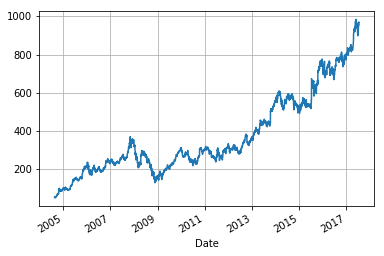

In [140]:
goog["Adj Close"].plot(grid = True)

In [141]:
appleStock = pd.read_csv("AAPL.csv", index_col=0, parse_dates=[0])

In [142]:
MicroStock = pd.read_csv("MSFT.csv", index_col=0, parse_dates=[0])

In [143]:
appleStock.head()

Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.423252  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.401170   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.371726   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.380927   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.391969   18362400.0

In [144]:
MicroStock.head()

Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.065242  1031788800
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.067572   308160000
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.068737   133171200
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.066990    67766400
1986-03-19  0.099826  0.100694  0.097222  0.098090   0.065825    47894400

In [145]:
goog.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100

In [148]:
stocks = pd.DataFrame({"AAPL":appleStock["Adj Close"],
                                 "GOOG":goog["Adj Close"],
                                 "MSFT":MicroStock["Adj Close"]})

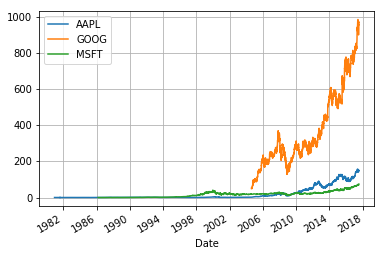

In [149]:
stocks.plot(grid=True)

In [153]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

In [156]:
valid_stocks.head(20)

AAPL       GOOG       MSFT
Date                                      
2004-08-19  1.981210  49.982655  18.360205
2004-08-20  1.987016  53.952770  18.414366
2004-08-23  2.005080  54.495735  18.495850
2004-08-24  2.061206  52.239193  18.495850
2004-08-25  2.132171  52.802086  18.706341
2004-08-26  2.236037  53.753517  18.631651
2004-08-27  2.216039  52.876804  18.645229
2004-08-30  2.201200  50.814533  18.536587
2004-08-31  2.225070  50.993862  18.536587
2004-09-01  2.313454  49.937820  18.597692
2004-09-02  2.300551  50.565468  18.753866
2004-09-03  2.272810  49.818268  18.407583
2004-09-07  2.307003  50.600338  18.577330
2004-09-08  2.345066  50.958992  18.509432
2004-09-09  2.303131  50.963974  18.523005
2004-09-10  2.314099  52.468334  18.665594
2004-09-13  2.296036  53.549286  18.502642
2004-09-14  2.289584  55.536835  18.631651
2004-09-15  2.270875  55.790882  18.461903
2004-09-16  2.345066  56.772205  18.509432

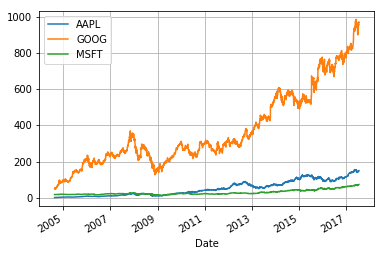

In [157]:
valid_stocks.plot(grid=True)

In [158]:
monthly_stocks = valid_stocks.resample("M").last()

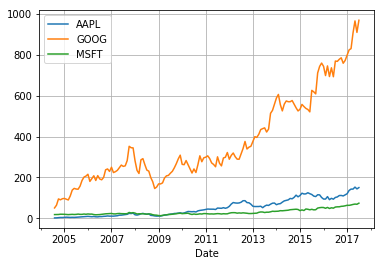

In [159]:
monthly_stocks.plot(grid = True)

In [171]:
bikeFile = pd.read_csv("bikes.csv", encoding="latin-1",sep=";",  dayfirst=True, index_col=0, parse_dates=[0])

In [172]:
bikeFile

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   
2012-01-04      144                                NaN                      1   
2012-01-05      197                                NaN                      2   
2012-01-06      146                                NaN                      0   
2012-01-07       98                                NaN                      2   
2012-01-08       95                                NaN                      1   
2012-01-09      244                                NaN                      2   
2012-01-10      397                                NaN                      3   
2012-01-11      273                                NaN                      0   
2012-01-12      157                                NaN                      1   
2012-01-13       75                                NaN                      0   
2012-01-14       32                                NaN                      0   
2012-01-15       54                                NaN                      0   
2012-01-16      168                                NaN                      2   
2012-01-17      155                                NaN                      0   
2012-01-18      139                                NaN                      0   
2012-01-19      191                                NaN                      1   
2012-01-20      161                                NaN                      4   
2012-01-21       53                                NaN                      0   
2012-01-22       71                                NaN                      0   
2012-01-23      210                                NaN                      6   
2012-01-24      299                                NaN                      1   
2012-01-25      334                                NaN                      1   
2012-01-26      306                                NaN                      0   
2012-01-27       91                                NaN                      5   
2012-01-28       80                                NaN                      1   
2012-01-29       87                                NaN                      1   
2012-01-30      219                                NaN                      0   
...             ...                                ...                    ...   
2012-10-07     1580                                NaN                    660   
2012-10-08     1854                                NaN                    880   
2012-10-09     4787                                NaN                   2210   
2012-10-10     3115                                NaN                   1537   
2012-10-11     3746                                NaN                   1857   
2012-10-12     3169                                NaN                   1460   
2012-10-13     1783                                NaN                    802   
2012-10-14      587                                NaN                    287   
2012-10-15     3292                                NaN                   1678   
2012-10-16     3739                                NaN                   1858   
2012-10-17     4098                                NaN                   1964   
2012-10-18     4671                                NaN                   2292   
2012-10-19     1313                                NaN                    597   
2012-10-20     2011                                NaN                    748   
2012-10-21     1277                                NaN                    609   
2012-10-22     3650                                NaN                   1819   
2012-10-23     4177                        

In [173]:
bikeFile.shape

(310, 9)

In [174]:
bikeFile.dropna(how="all",axis=1)

Berri 1  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  \
Date                                                                       
2012-01-01       35                      0             38             51   
2012-01-02       83                      1             68            153   
2012-01-03      135                      2            104            248   
2012-01-04      144                      1            116            318   
2012-01-05      197                      2            124            330   
2012-01-06      146                      0             98            244   
2012-01-07       98                      2             80            108   
2012-01-08       95                      1             62             98   
2012-01-09      244                      2            165            432   
2012-01-10      397                      3            238            563   
2012-01-11      273                      0            182            443   
2012-01-12      157                      1            134            261   
2012-01-13       75                      0             41            105   
2012-01-14       32                      0             54             56   
2012-01-15       54                      0             33             60   
2012-01-16      168                      2            136            312   
2012-01-17      155                      0             86            256   
2012-01-18      139                      0             66            188   
2012-01-19      191                      1            104            248   
2012-01-20      161                      4             96            217   
2012-01-21       53                      0             47             70   
2012-01-22       71                      0             41             73   
2012-01-23      210                      6            114            357   
2012-01-24      299                      1            189            444   
2012-01-25      334                      1            217            453   
2012-01-26      306                      0            215            495   
2012-01-27       91                      5             79            204   
2012-01-28       80                      1             61            123   
2012-01-29       87                      1             65            132   
2012-01-30      219                      0            146            371   
...             ...                    ...            ...            ...   
2012-10-07     1580                    660            922           1629   
2012-10-08     1854                    880            987           1818   
2012-10-09     4787                   2210           3026           5138   
2012-10-10     3115                   1537           2081           3681   
2012-10-11     3746                   1857           2569           4694   
2012-10-12     3169                   1460           2261           4045   
2012-10-13     1783                    802           1205           2113   
2012-10-14      587                    287            443            852   
2012-10-15     3292                   1678           2165           4197   
2012-10-16     3739                   1858           2684           4681   
2012-10-17     4098                   1964           2645           4836   
2012-10-18     4671                   2292           3129           5542   
2012-10-19     1313                    597            885           1668   
2012-10-20     2011                    748           1323           2266   
2012-10-21     1277                    609            869           1777   
2012-10-22     3650                   1819           2495           4800   
2012-10-23     4177                   1997           2795           5216   
2012-10-24     3744                   1868           2625           4900   
2012-10-25     3735                   1815           2528           5010   
2012-10-26     4290                   1987           2754   

In [175]:
bikeFile.T.fillna(bikeFile.mean(1).T).T.head()

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01     35.0                          25.142857                    0.0   
2012-01-02     83.0                          58.142857                    1.0   
2012-01-03    135.0                          91.285714                    2.0   
2012-01-04    144.0                         108.428571                    1.0   
2012-01-05    197.0                         122.571429                    2.0   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01           38.0           51.0     26.0          10.0     16.0   
2012-01-02           68.0          153.0     53.0           6.0     43.0   
2012-01-03          104.0          248.0     89.0           3.0     58.0   
2012-01-04          116.0          318.0    111.0           8.0     61.0   
2012-01-05          124.0          330.0     97.0          13.0     95.0   

            St-Urbain (données non disponibles)  
Date                                             
2012-01-01                            25.142857  
2012-01-02                            58.142857  
2012-01-03                            91.285714  
2012-01-04                           108.428571  
2012-01-05                           122.571429

In [176]:
berri_bikes = bikeFile[["Berri 1"]]

In [177]:
berri_bikes.head(20)

Berri 1
Date               
2012-01-01       35
2012-01-02       83
2012-01-03      135
2012-01-04      144
2012-01-05      197
2012-01-06      146
2012-01-07       98
2012-01-08       95
2012-01-09      244
2012-01-10      397
2012-01-11      273
2012-01-12      157
2012-01-13       75
2012-01-14       32
2012-01-15       54
2012-01-16      168
2012-01-17      155
2012-01-18      139
2012-01-19      191
2012-01-20      161

In [178]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [180]:
berri_bikes.loc[:, "weekday"] = berri_bikes.index.weekday

/usr/lib/python3/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [181]:
berri_bikes

Berri 1  weekday
Date                        
2012-01-01       35        6
2012-01-02       83        0
2012-01-03      135        1
2012-01-04      144        2
2012-01-05      197        3
2012-01-06      146        4
2012-01-07       98        5
2012-01-08       95        6
2012-01-09      244        0
2012-01-10      397        1
2012-01-11      273        2
2012-01-12      157        3
2012-01-13       75        4
2012-01-14       32        5
2012-01-15       54        6
2012-01-16      168        0
2012-01-17      155        1
2012-01-18      139        2
2012-01-19      191        3
2012-01-20      161        4
2012-01-21       53        5
2012-01-22       71        6
2012-01-23      210        0
2012-01-24      299        1
2012-01-25      334        2
2012-01-26      306        3
2012-01-27       91        4
2012-01-28       80        5
2012-01-29       87        6
2012-01-30      219        0
...             ...      ...
2012-10-07     1580        6
2012-10-08     1854        0
2012-10-09     4787        1
2012-10-10     3115        2
2012-10-11     3746        3
2012-10-12     3169        4
2012-10-13     1783        5
2012-10-14      587        6
2012-10-15     3292        0
2012-10-16     3739        1
2012-10-17     4098        2
2012-10-18     4671        3
2012-10-19     1313        4
2012-10-20     2011        5
2012-10-21     1277        6
2012-10-22     3650        0
2012-10-23     4177        1
2012-10-24     3744        2
2012-10-25     3735        3
2012-10-26     4290        4
2012-10-27     1857        5
2012-10-28     1310        6
2012-10-29     2919        0
2012-10-30     2887        1
2012-10-31     2634        2
2012-11-01     2405        3
2012-11-02     1582        4
2012-11-03      844        5
2012-11-04      966        6
2012-11-05     2247        0

[310 rows x 2 columns]

In [182]:
weekday_counts = berri_bikes.groupby("weekday").mean()

In [183]:
weekday_counts

Berri 1
weekday             
0        2984.400000
1        3075.113636
2        3476.636364
3        3639.340909
4        3222.068182
5        2308.590909
6        2206.888889

In [184]:
weekday_counts.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [185]:
weekday_counts

Berri 1
Monday     2984.400000
Tuesday    3075.113636
Wednesday  3476.636364
Thursday   3639.340909
Friday     3222.068182
Saturday   2308.590909
Sunday     2206.888889

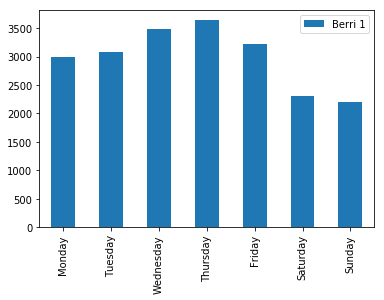

In [186]:
weekday_counts.plot(kind="bar")